In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%store -r data_frame
df = data_frame

In [3]:
def make_graph(df):
    comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
    distances = [0, 2, 4, 16, 68, 'many']
    # For different graph look reverse distances list (make sure to alter elif statment in graph_for_distance func)
    distances.reverse()
    zero_placing = 8

    def average_for_comp(df, comp):
        ordered = df[df['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = df[df['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        proportion = (len(corr)) / len(temp)
        return proportion

    def graph_for_distance(index, comparisons, distances, df, zp):
        # for each comparison for this distance (i.e. 4 and 16) add the average to the y array in order (FOR COMP = DISTANCE, set to 0.5)
        y = []
        for i in range(len(distances)):
            if i == index:
                y.append(0.5)
            # Switch sign if distances list is reversed
            elif i > distances.index(distances[index]):
                y.append(average_for_comp(df, [distances[index], distances[i]]))
            else:
                y.append(average_for_comp(df, [distances[i], distances[index]]))
        x = [1, 2, 3, 4, 5, zp]

        # graph the line:
        color = 'black'
        marker = 'o'

        #colors = ['black', 'm', 'blue', 'green', 'gold', 'tomato']
        colors = ['black', 'gray', 'black', 'gray', 'black', 'gray']
        color = colors[index]
        #markers = ['o', 'v', 's', 'P', 'd', 'X' ]
        #marker = markers[index]
        linestyles = ['-', '--', '-', '--', '-', '--',]
        linestyle = linestyles[index]

        for i in range(len(y)):
            # can switch sign for different graph look
            if i < index:
                y[i] = 1 - y[i]

        # Graph line
        ax.plot(x, y, clip_on = False, linestyle = linestyle, color = color, marker = marker, label=distances[index])
        plt.text(x[index],
                 y[index],
                 '  ' + str(distances[index]),
                 verticalalignment = 'top')

    fig, ax = plt.subplots()
    plt.title('Cross Category Recency Judgements')
    plt.ylabel("Probability of Judging 'A' More Recent")
    plt.xlabel("Cards Since 'A'")
    #plt.xticks(range(0, len(distances)))
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0,1,5))
    plt.xlim(0.6, zero_placing+0.4)
    plt.xticks([1, 2, 3, 4, 5, zero_placing], distances)
    ax.yaxis.set_ticks_position('both')

    for i in range(len(distances)):
        graph_for_distance(i, comparisons, distances, df, zero_placing)
        ax.plot([1, 2, 3, 4, 5, zero_placing],
                [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                marker = '.',
                color = 'white',
                linestyle = 'None')

    
    plt.text(zero_placing - 0.575, 0.325, 'Cards')
    plt.text(zero_placing - 0.675, 0.275, "Since 'B'")
    plt.show()
    #plt.savefig('blah')

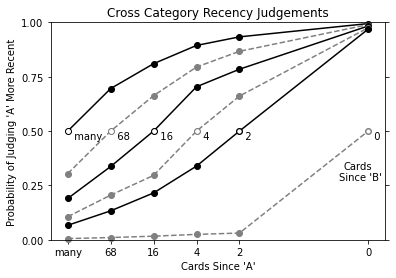

In [4]:
make_graph(df)

In [5]:
dataframe = pd.read_csv('JOR_1963_data.csv')
data = dataframe.values.tolist()

In [6]:
def make_og_graph(data):
    
    comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
    distances = [0, 2, 4, 16, 68, 'many']
    distances.reverse()
    zero_placing = 8
    
    fig, ax = plt.subplots()
    plt.title('Cross Category Recency Judgements')
    plt.ylabel("Probability of Judging 'A' More Recent")
    plt.xlabel("Cards Since 'A'")
    #plt.xticks(range(0, len(distances)))
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0,1,5))
    plt.xlim(0.6, zero_placing+0.4)
    plt.xticks([1, 2, 3, 4, 5, zero_placing], distances)
    ax.yaxis.set_ticks_position('both')

    x = [1, 2, 3, 4, 5, zero_placing]
    for i in range(len(data)):
        if i % 2 == 0:
            color = 'grey'
            linestyle = '--'
        else:
            color = 'black'
            linestyle = '-'
        ax.plot(x, data[i], color = color, linestyle = linestyle, marker = 'o')
        plt.text(x[i],
                 data[i][len(data[i]) - i - 1],
                 '  ' + str(distances[i]),
                 verticalalignment = 'top')
    
    ax.plot([1, 2, 3, 4, 5, zero_placing],
            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
            marker = '.',
            color = 'white',
            linestyle = 'None')
    plt.text(zero_placing - 0.575, 0.325, 'Cards')
    plt.text(zero_placing - 0.675, 0.275, "Since 'B'")
    plt.savefig('og_jor_graph.pdf', format='pdf', dpi=1200)
    plt.show()

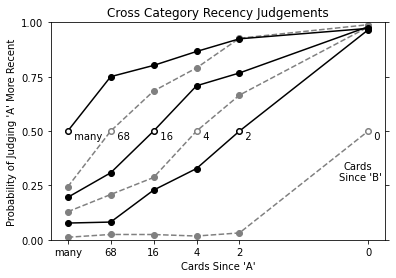

In [7]:
make_og_graph(data)

In [8]:
def superimposed_graph(data, df):
    comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
    distances = [0, 2, 4, 16, 68, 'many']
    distances.reverse()
    zero_placing = 8
    
    def average_for_comp(df, comp):
        ordered = df[df['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = df[df['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        proportion = (len(corr)) / len(temp)
        return proportion

    def graph_for_distance(index, comparisons, distances, df, zp):
        # for each comparison for this distance (i.e. 4 and 16) add the average to the y array in order (FOR COMP = DISTANCE, set to 0.5)
        y = []
        for i in range(len(distances)):
            if i == index:
                y.append(0.5)
            # Switch sign if distances list is reversed
            elif i > distances.index(distances[index]):
                y.append(average_for_comp(df, [distances[index], distances[i]]))
            else:
                y.append(average_for_comp(df, [distances[i], distances[index]]))
        x = [1, 2, 3, 4, 5, zp]

        # graph the line:
        color = 'black'
        marker = 'o'

        #colors = ['black', 'm', 'blue', 'green', 'gold', 'tomato']
        #colors = ['pink', 'red', 'pink', 'red', 'pink', 'red']
        colors = ['red', 'pink', 'red', 'pink', 'red', 'pink']
        #colors = ['mediumblue', 'royalblue', 'blue', 'royalblue', 'blue', 'royalblue']
        color = colors[index]
        #markers = ['o', 'v', 's', 'P', 'd', 'X' ]
        #marker = markers[index]
        linestyles = ['-', '--', '-', '--', '-', '--',]
        linestyle = linestyles[index]

        for i in range(len(y)):
            # can switch sign for different graph look
            if i < index:
                y[i] = 1 - y[i]

        # Graph line
        ax.plot(x, y, clip_on = False, linestyle = linestyle, color = color, marker = marker, label=distances[index])
        plt.text(x[index],
                 y[index],
                 '  ' + str(distances[index]),
                 verticalalignment = 'top')
        
    fig, ax = plt.subplots()
    plt.title('Cross Category Recency Judgements')
    plt.ylabel("Probability of Judging 'A' More Recent")
    plt.xlabel("Cards Since 'A'")
    #plt.xticks(range(0, len(distances)))
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0,1,5))
    plt.xlim(0.6, zero_placing+0.4)
    plt.xticks([1, 2, 3, 4, 5, zero_placing], distances)
    ax.yaxis.set_ticks_position('both')

    x = [1, 2, 3, 4, 5, zero_placing]
    for i in range(len(data)):
        graph_for_distance(i, comparisons, distances, df, zero_placing)
        if i % 2 == 0:
            color = 'grey'
            linestyle = '--'
        else:
            color = 'black'
            linestyle = '-'
        ax.plot(x, data[i], color = color, linestyle = linestyle, marker = 'o')
        plt.text(x[i],
                 data[i][len(data[i]) - i - 1],
                 '  ' + str(distances[i]),
                 verticalalignment = 'top')
    
    ax.plot([1, 2, 3, 4, 5, zero_placing],
            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
            marker = '.',
            color = 'white',
            linestyle = 'None')
    plt.text(zero_placing - 0.575, 0.325, 'Cards')
    plt.text(zero_placing - 0.675, 0.275, "Since 'B'")
    plt.savefig('jor_superimposition.pdf', format='pdf', dpi=1200)
    plt.show()

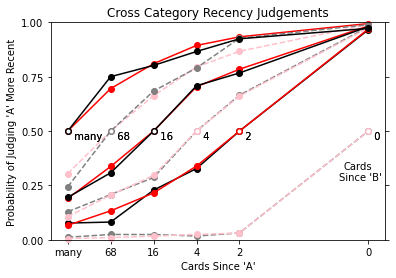

In [9]:
superimposed_graph(data, df)